![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad2024-12-prediccion-precio-vehiculos).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np

In [ ]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [ ]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


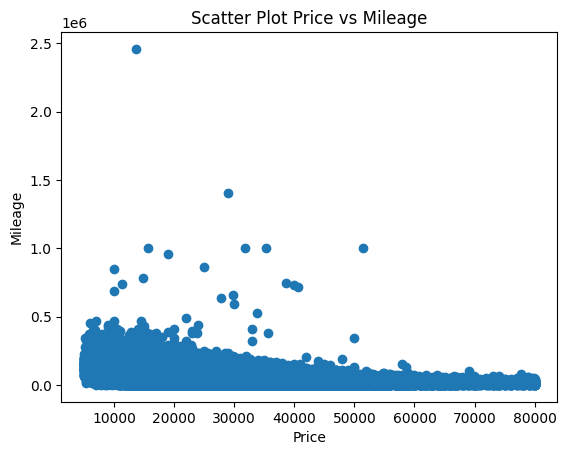

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dataTraining['Price'], dataTraining['Mileage'])

# Agregar etiquetas y título
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Scatter Plot Price vs Mileage')

# Mostrar el scatter plot
plt.show()

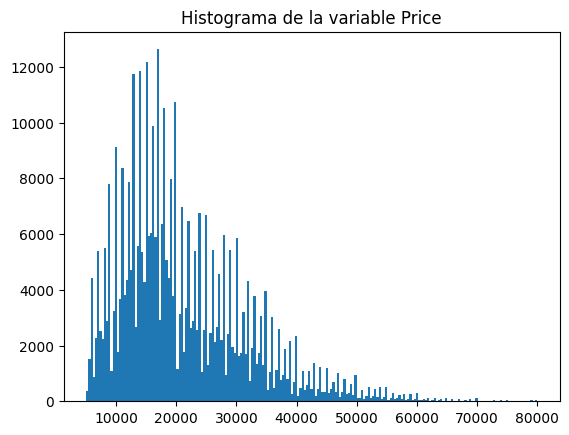

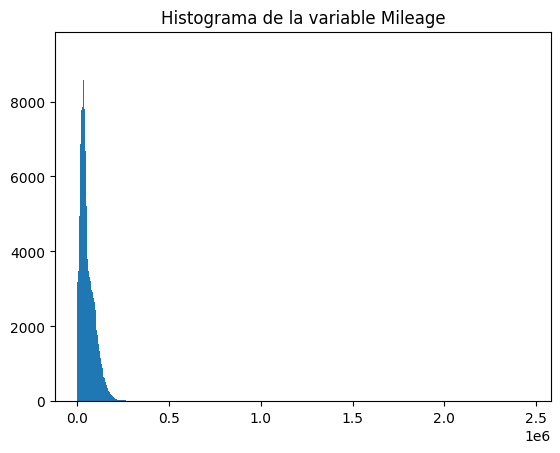

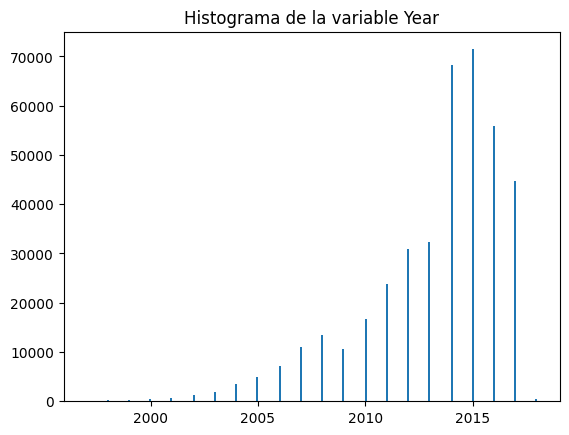

In [ ]:
import matplotlib.pyplot as plt

year = dataTraining['Year']
mileage = dataTraining['Mileage']
price = dataTraining['Price']

plt.hist(price, bins='auto')
mensaje = ['Histograma de la variable Price']
plt.title(" ".join(mensaje))
plt.show()


plt.hist(mileage, bins='auto')
mensaje = ['Histograma de la variable Mileage']
plt.title(" ".join(mensaje))
plt.show()

plt.hist(year, bins='auto')
mensaje = ['Histograma de la variable Year']
plt.title(" ".join(mensaje))
plt.show()


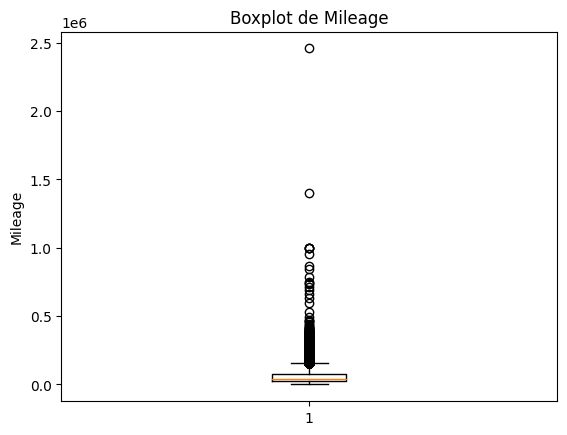

In [ ]:
plt.boxplot(dataTraining['Mileage'])

# Agregar etiquetas y título
plt.ylabel('Mileage')
plt.title('Boxplot de Mileage')

# Mostrar el boxplot
plt.show()

In [ ]:
val_state = dataTraining['State'].value_counts()
print(val_state)

State
 TX    45918
 CA    36534
 FL    33759
 GA    18182
 NC    17930
 IL    16793
 VA    15894
 PA    13039
 NY    12447
 NJ    12132
 OH    11364
 WA    10900
 CO    10875
 AZ    10749
 TN     9274
 MA     8586
 MD     8245
 MO     8029
 IN     7850
 KY     6688
 AL     6283
 WI     5614
 MN     5415
 MI     5327
 OK     5096
 CT     4942
 OR     4907
 UT     4854
 SC     4815
 LA     3847
 KS     3704
 NV     3332
 AR     3128
 MS     3043
 NH     2744
 NE     2522
 IA     2325
 NM     2280
 ID     1736
 DE     1221
 HI     1181
 MT      997
 ME      965
 RI      833
 AK      813
 ND      681
 WV      666
 SD      621
 VT      579
 WY      335
 DC        6
Name: count, dtype: int64


In [ ]:
val_make = dataTraining['Make'].value_counts()
print(val_make)

Make
Ford             62899
Chevrolet        58383
Toyota           45941
Honda            33191
Jeep             24369
GMC              20834
Kia              16352
Dodge            16159
Hyundai          15057
Lexus            13664
BMW              12326
Volkswagen       11110
Nissan           10569
Chrysler          9046
Mercedes-Benz     7575
Subaru            6791
Cadillac          5414
Buick             4842
Ram               3611
MINI              2766
Land              2713
INFINITI          2406
Acura             2403
Mazda             2332
Lincoln           1786
Volvo             1710
Audi              1423
Mitsubishi        1272
Porsche            980
Scion              651
Jaguar             324
Pontiac            308
FIAT               272
Mercury            271
Tesla              148
Bentley             57
Suzuki              38
Freightliner         7
Name: count, dtype: int64


In [ ]:
val_model = dataTraining['Model'].value_counts()
print(val_model)

Model
Silverado          18085
Grand              12344
Sierra              8409
Accord              7357
F-1504WD            6684
                   ...  
PathfinderSE          53
Galant4dr             53
SLK-ClassSLK350       52
Monte                 48
RX-84dr               48
Name: count, Length: 525, dtype: int64


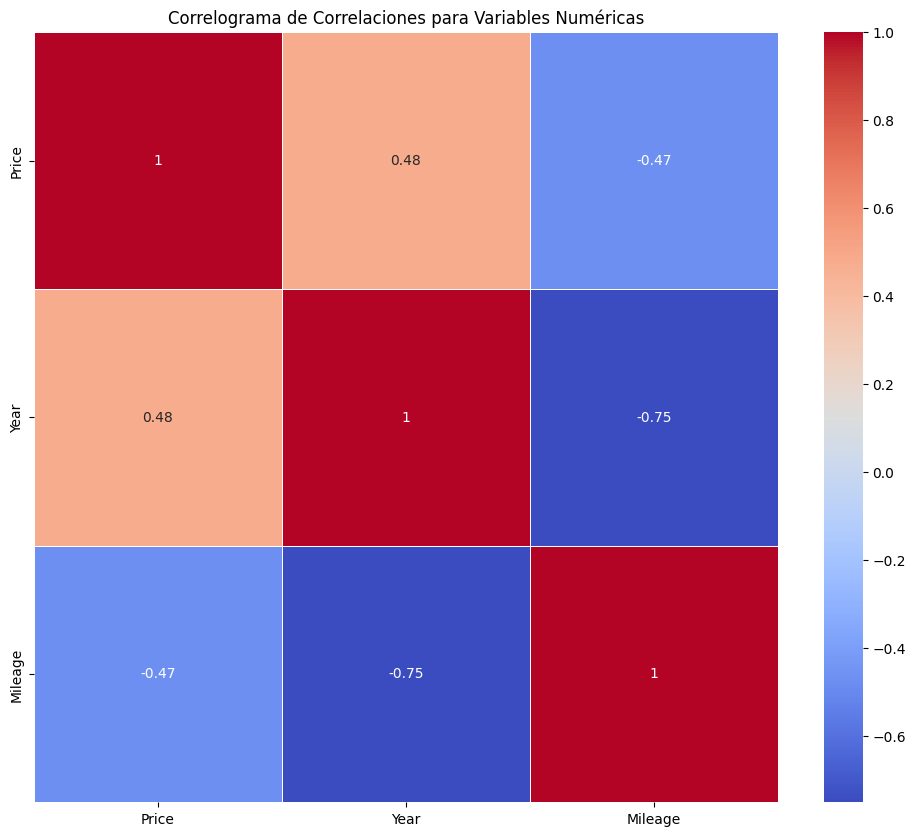

In [ ]:
import seaborn as sns
variables_numericas = dataTraining.select_dtypes(include=['int64', 'float64'])
correlation_matrix = variables_numericas.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlograma de Correlaciones para Variables Numéricas')
plt.show()

In [ ]:
print(dataTraining.describe())

               Price           Year       Mileage
count  400000.000000  400000.000000  4.000000e+05
mean    21146.919312    2013.198125  5.507296e+04
std     10753.664940       3.292326  4.088102e+04
min      5001.000000    1997.000000  5.000000e+00
25%     13499.000000    2012.000000  2.584100e+04
50%     18450.000000    2014.000000  4.295500e+04
75%     26999.000000    2016.000000  7.743300e+04
max     79999.000000    2018.000000  2.457832e+06


In [ ]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


## Librerías

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


## 0. Preprocesamiento de Datos

Los datos de entrenamiento se dividen en datos de entrenamiento y validación. Si decidieron preprocesar los datos (estandarizar, normalizar, imputar valores, etc), estos son correctamente preprocesados al ajustar sobre los datos de entrenamiento (.fit_transform()) y al transformar los datos del set de validación (.transform()). (10 puntos)

In [ ]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [ ]:
# Visualización datos de entrenamiento
print(dataTraining.head
())

   Price  Year  Mileage State       Make      Model
0  34995  2017     9913    FL       Jeep   Wrangler
1  37895  2015    20578    OH  Chevrolet   Tahoe4WD
2  18430  2012    83716    TX        BMW      X5AWD
3  24681  2014    28729    OH   Cadillac  SRXLuxury
4  26998  2013    64032    CO       Jeep   Wrangler


In [ ]:
# Visualización datos de test
print(dataTesting.head())

    Year  Mileage State    Make        Model
ID                                          
0   2014    31909    MD  Nissan    MuranoAWD
1   2017     5362    FL    Jeep     Wrangler
2   2014    50300    OH    Ford  FlexLimited
3   2004   132160    WA     BMW            5
4   2015    25226    MA    Jeep        Grand


In [ ]:
# Convertir variables categóricas en variables dummy
dataTraining = pd.get_dummies(dataTraining, columns=['State', 'Make', 'Model'])

# Visualizar los primeros registros del conjunto de datos preprocesado
print(dataTraining.head())

   Price  Year  Mileage  State_ AK  State_ AL  State_ AR  State_ AZ  \
0  34995  2017     9913      False      False      False      False   
1  37895  2015    20578      False      False      False      False   
2  18430  2012    83716      False      False      False      False   
3  24681  2014    28729      False      False      False      False   
4  26998  2013    64032      False      False      False      False   

   State_ CA  State_ CO  State_ CT  ...  Model_Yaris4dr  Model_YarisBase  \
0      False      False      False  ...           False            False   
1      False      False      False  ...           False            False   
2      False      False      False  ...           False            False   
3      False      False      False  ...           False            False   
4      False       True      False  ...           False            False   

   Model_YarisLE  Model_Yukon  Model_Yukon2WD  Model_Yukon4WD  Model_Yukon4dr  \
0          False        False      

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = dataTraining.drop('Price', axis=1)
y = dataTraining['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar modelos
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
xgboost = XGBRegressor(random_state=42)

# Definir hiperparámetros a buscar para cada modelo
param_grid_dt = {'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}
param_grid_gb = {'n_estimators': [100, 200, 300],
                 'learning_rate': [0.05, 0.1, 0.2]}
param_grid_xgb = {'n_estimators': [100, 200, 300],
                  'learning_rate': [0.05, 0.1, 0.2]}

# Realizar búsqueda de hiperparámetros para cada modelo
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5)
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5)
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5)

# Entrenar modelos con la mejor combinación de hiperparámetros
grid_search_dt.fit(XTrain, yTrain)
grid_search_rf.fit(XTrain, yTrain)
grid_search_gb.fit(XTrain, yTrain)
grid_search_xgb.fit(XTrain, yTrain)

# Obtener los mejores modelos
best_dt = grid_search_dt.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Imprimir mensaje de finalización
print("Entrenamiento completado.")

In [ ]:
# Evaluar el rendimiento en el conjunto de prueba
y_pred_dt = best_dt.predict(XTest)
mse_dt = mean_squared_error(yTest, y_pred_dt)

y_pred_rf = best_rf.predict(XTest)
mse_rf = mean_squared_error(yTest, y_pred_rf)

y_pred_gb = best_gb.predict(XTest)
mse_gb = mean_squared_error(yTest, y_pred_gb)

y_pred_xgb = best_xgb.predict(XTest)
mse_xgb = mean_squared_error(yTest, y_pred_xgb)

# Imprimir las métricas de rendimiento
print("MSE Decision Tree:", mse_dt)
print("MSE Random Forest:", mse_rf)
print("MSE Gradient Boosting:", mse_gb)
print("MSE XGBoost:", mse_xgb)


In [5]:
best_estimator_string = """
XGBRegressor(booster="gbtree",colsample_bytree=1,eta=0.3,
    gamma=1,max_depth=9,max_leaves=0,n_estimators=550,
    objective="reg:linear",reg_alpha=2,
    reg_lambda=2,tree_method="auto", subsample=0.7,random_state=42)
"""

print(best_estimator_string)



XGBRegressor(booster="gbtree",colsample_bytree=1,eta=0.3,
    gamma=1,max_depth=9,max_leaves=0,n_estimators=550,
    objective="reg:linear",reg_alpha=2,
    reg_lambda=2,tree_method="auto", subsample=0.7,random_state=42)

